# Plate cam with simple harmonic motion example
## Reciprocating radial roller follower

The reciprocating radial roller follower of a plate
cam is to rise 2 in with simple harmonic motion
in 180◦ of cam rotation and return with simple
harmonic motion in the remaining 180◦. If the roller
radius is 0.375 in and the prime-circle radius is 2 in,
construct the displacement diagram, the pitch curve,
and the cam profile for clockwise cam rotation.

## Libraries

It must be used the ```DiskCamMechanismLibrary``` library, which can be found on this [link](https://github.com/mauriciocaixba/leva-cam.git),  ```matplotlib``` and ```numpy``` must to be installed on the python system.

In [4]:
from DiskCamMechanismLibrary import PDCamRollerFollower
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

## Simple harmonic motion
The simple harmonic motion equations for rise and fall of the follower are shown below:

\begin{align*}
y&=\frac{L}{2}\left(1-\cos \theta\right)\\
y'&=\frac{L}{2}\sin \theta\\
y''&=\frac{L}{2}\cos \theta
\end{align*}

where $L$ is the maximum displacement reached by the follower and $\theta$ is the angular position of the cam.

The following python code is added to calculate the displacement, velocity and acceleration of the follower.

In [6]:
def SimpleHarmonicMotion(th,L):
    y = 0.5*L*(1-np.cos(th))
    yp = 0.5*L*np.sin(th)
    ypp = 0.5*L*np.cos(th)
    return y,yp,ypp

## Problem data:
\begin{align*}
L&=2 \text{ in}\\
r_{\text{prime}}&=2\text{ in}\\
r_{\text{roller}}&=0.375 \text{ in}
\end{align*}

In [8]:
L=2
Rprime=2 #prime radius circle
rd=0.375 #roller radius
Rdrill=3/16 # drill bit radius (cam center)
eccentricity = 0.0
FollowerAng = np.pi/2 # Angular position of the follower in radians
theta = np.linspace(0,1,500)*2*np.pi # angular sweep from zero to 2 pi radians
# calculate displacement, velocity, acceleration
y,yp,ypp = SimpleHarmonicMotion(theta,L) 

# Group data in dictionary, for other parameters consult the documentation of DiskCamMechanismLibrary
CamData={'theta':theta,
         'y':y,
         'yp':yp,
         'ypp':ypp,
         'Rbase':Rprime,
         'Rhole':Rdrill,
         'epsilon':eccentricity,
         'FollowerAng':FollowerAng,
         'Followerwidth': 4/16,
         'turn_direction':'clockwise',
         'Rroller':rd
        }

## Calculating the Cam Profile

In [10]:
Cam=PDCamRollerFollower(**CamData)

## Motion diagram

array([<Axes: title={'center': 'Displacement Diagram'}>,
       <Axes: title={'center': 'Velocity Diagram'}>,
       <Axes: title={'center': 'Acceleration Diagram'}, xlabel='Angle [radians]'>],
      dtype=object)

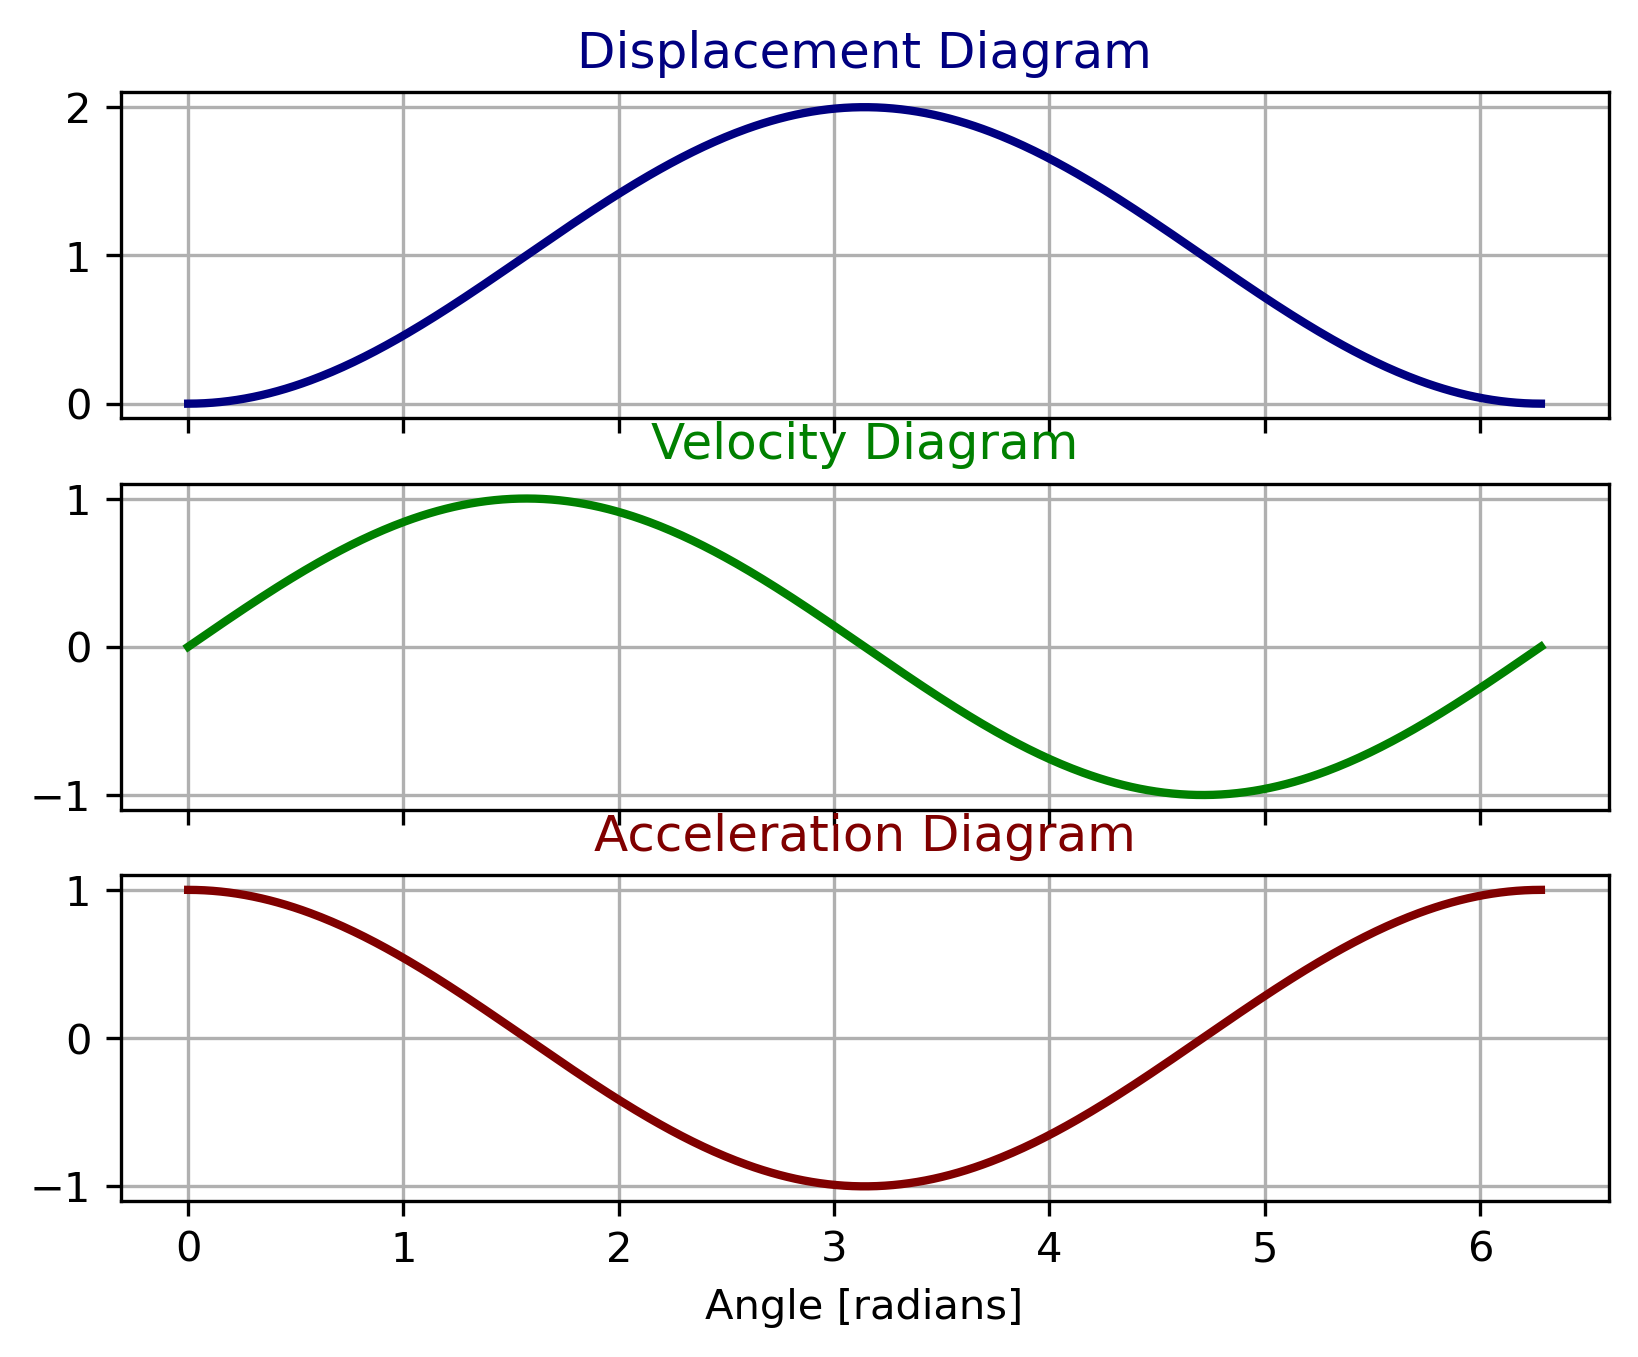

In [12]:
figMD=plt.figure()
Cam.PlotMotionDiagram(figMD)

## Plot the cam profile

<Axes: >

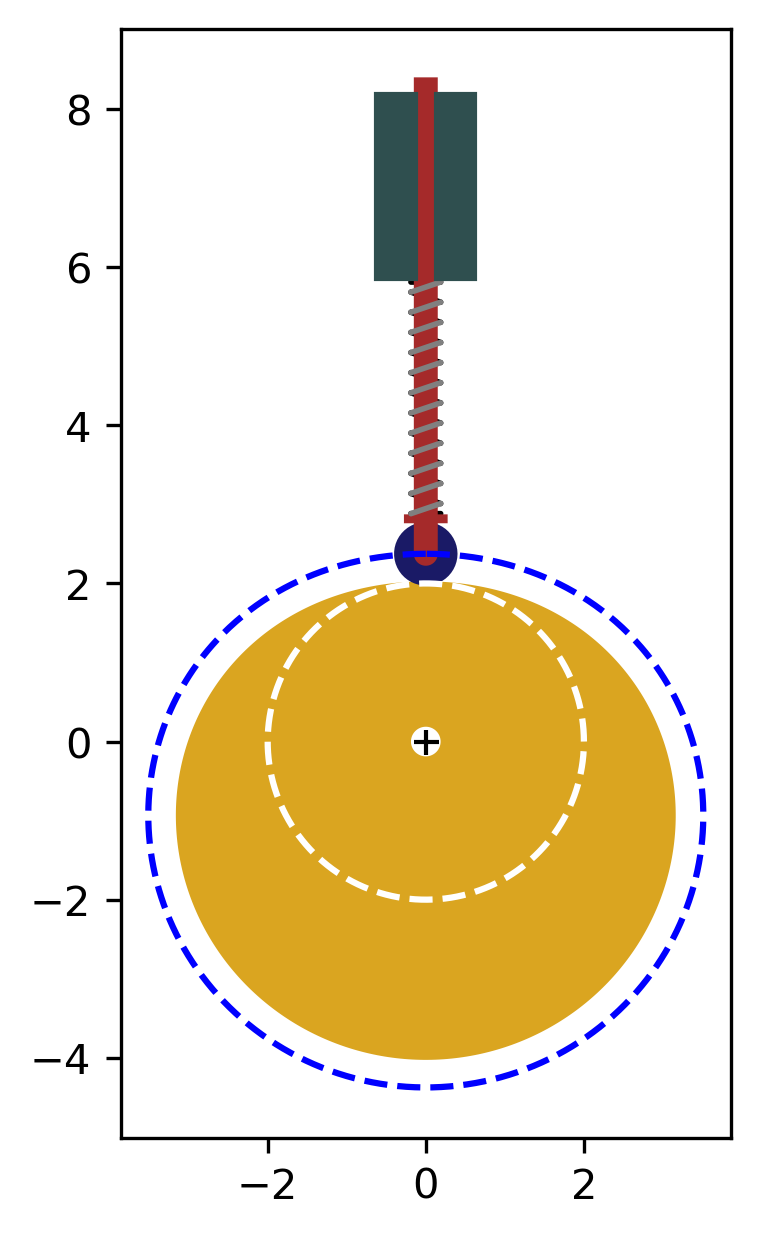

In [14]:
figPCam=plt.figure()
Cam.PlotCamRollerFollower(figPCam)

The profile coordinate data is found in the attributes ```Cam.Xp``` y ```Cam.Yp```:

In [16]:
print(Cam.Xp[0:10]) # Just a few data
print(Cam.Yp[0:10]) # Just a few data

[ 7.65404249e-17 -2.71713421e-02 -5.43432515e-02 -8.15162928e-02
 -1.08691026e-01 -1.35868003e-01 -1.63047766e-01 -1.90230845e-01
 -2.17417755e-01 -2.44608993e-01]
[2.         1.99990096 1.99960379 1.99910835 1.99841441 1.99752165
 1.99642963 1.99513786 1.99364574 1.99195256]


The pitch curve data is found in the attributes ```Cam.Xr``` y ```Cam.Yr```:

In [18]:
print(Cam.Xr[0:10]) # Just a few data
print(Cam.Yr[0:10]) # Just a few data

[ 1.45426807e-16 -2.99051480e-02 -5.98115427e-02 -8.97204269e-02
 -1.19633035e-01 -1.49550591e-01 -1.79474300e-01 -2.09405350e-01
 -2.39344903e-01 -2.69294096e-01]
[2.375      2.37489099 2.37456392 2.3740186  2.37325474 2.37227194
 2.37106969 2.36964733 2.36800412 2.3661392 ]


## Cam animation

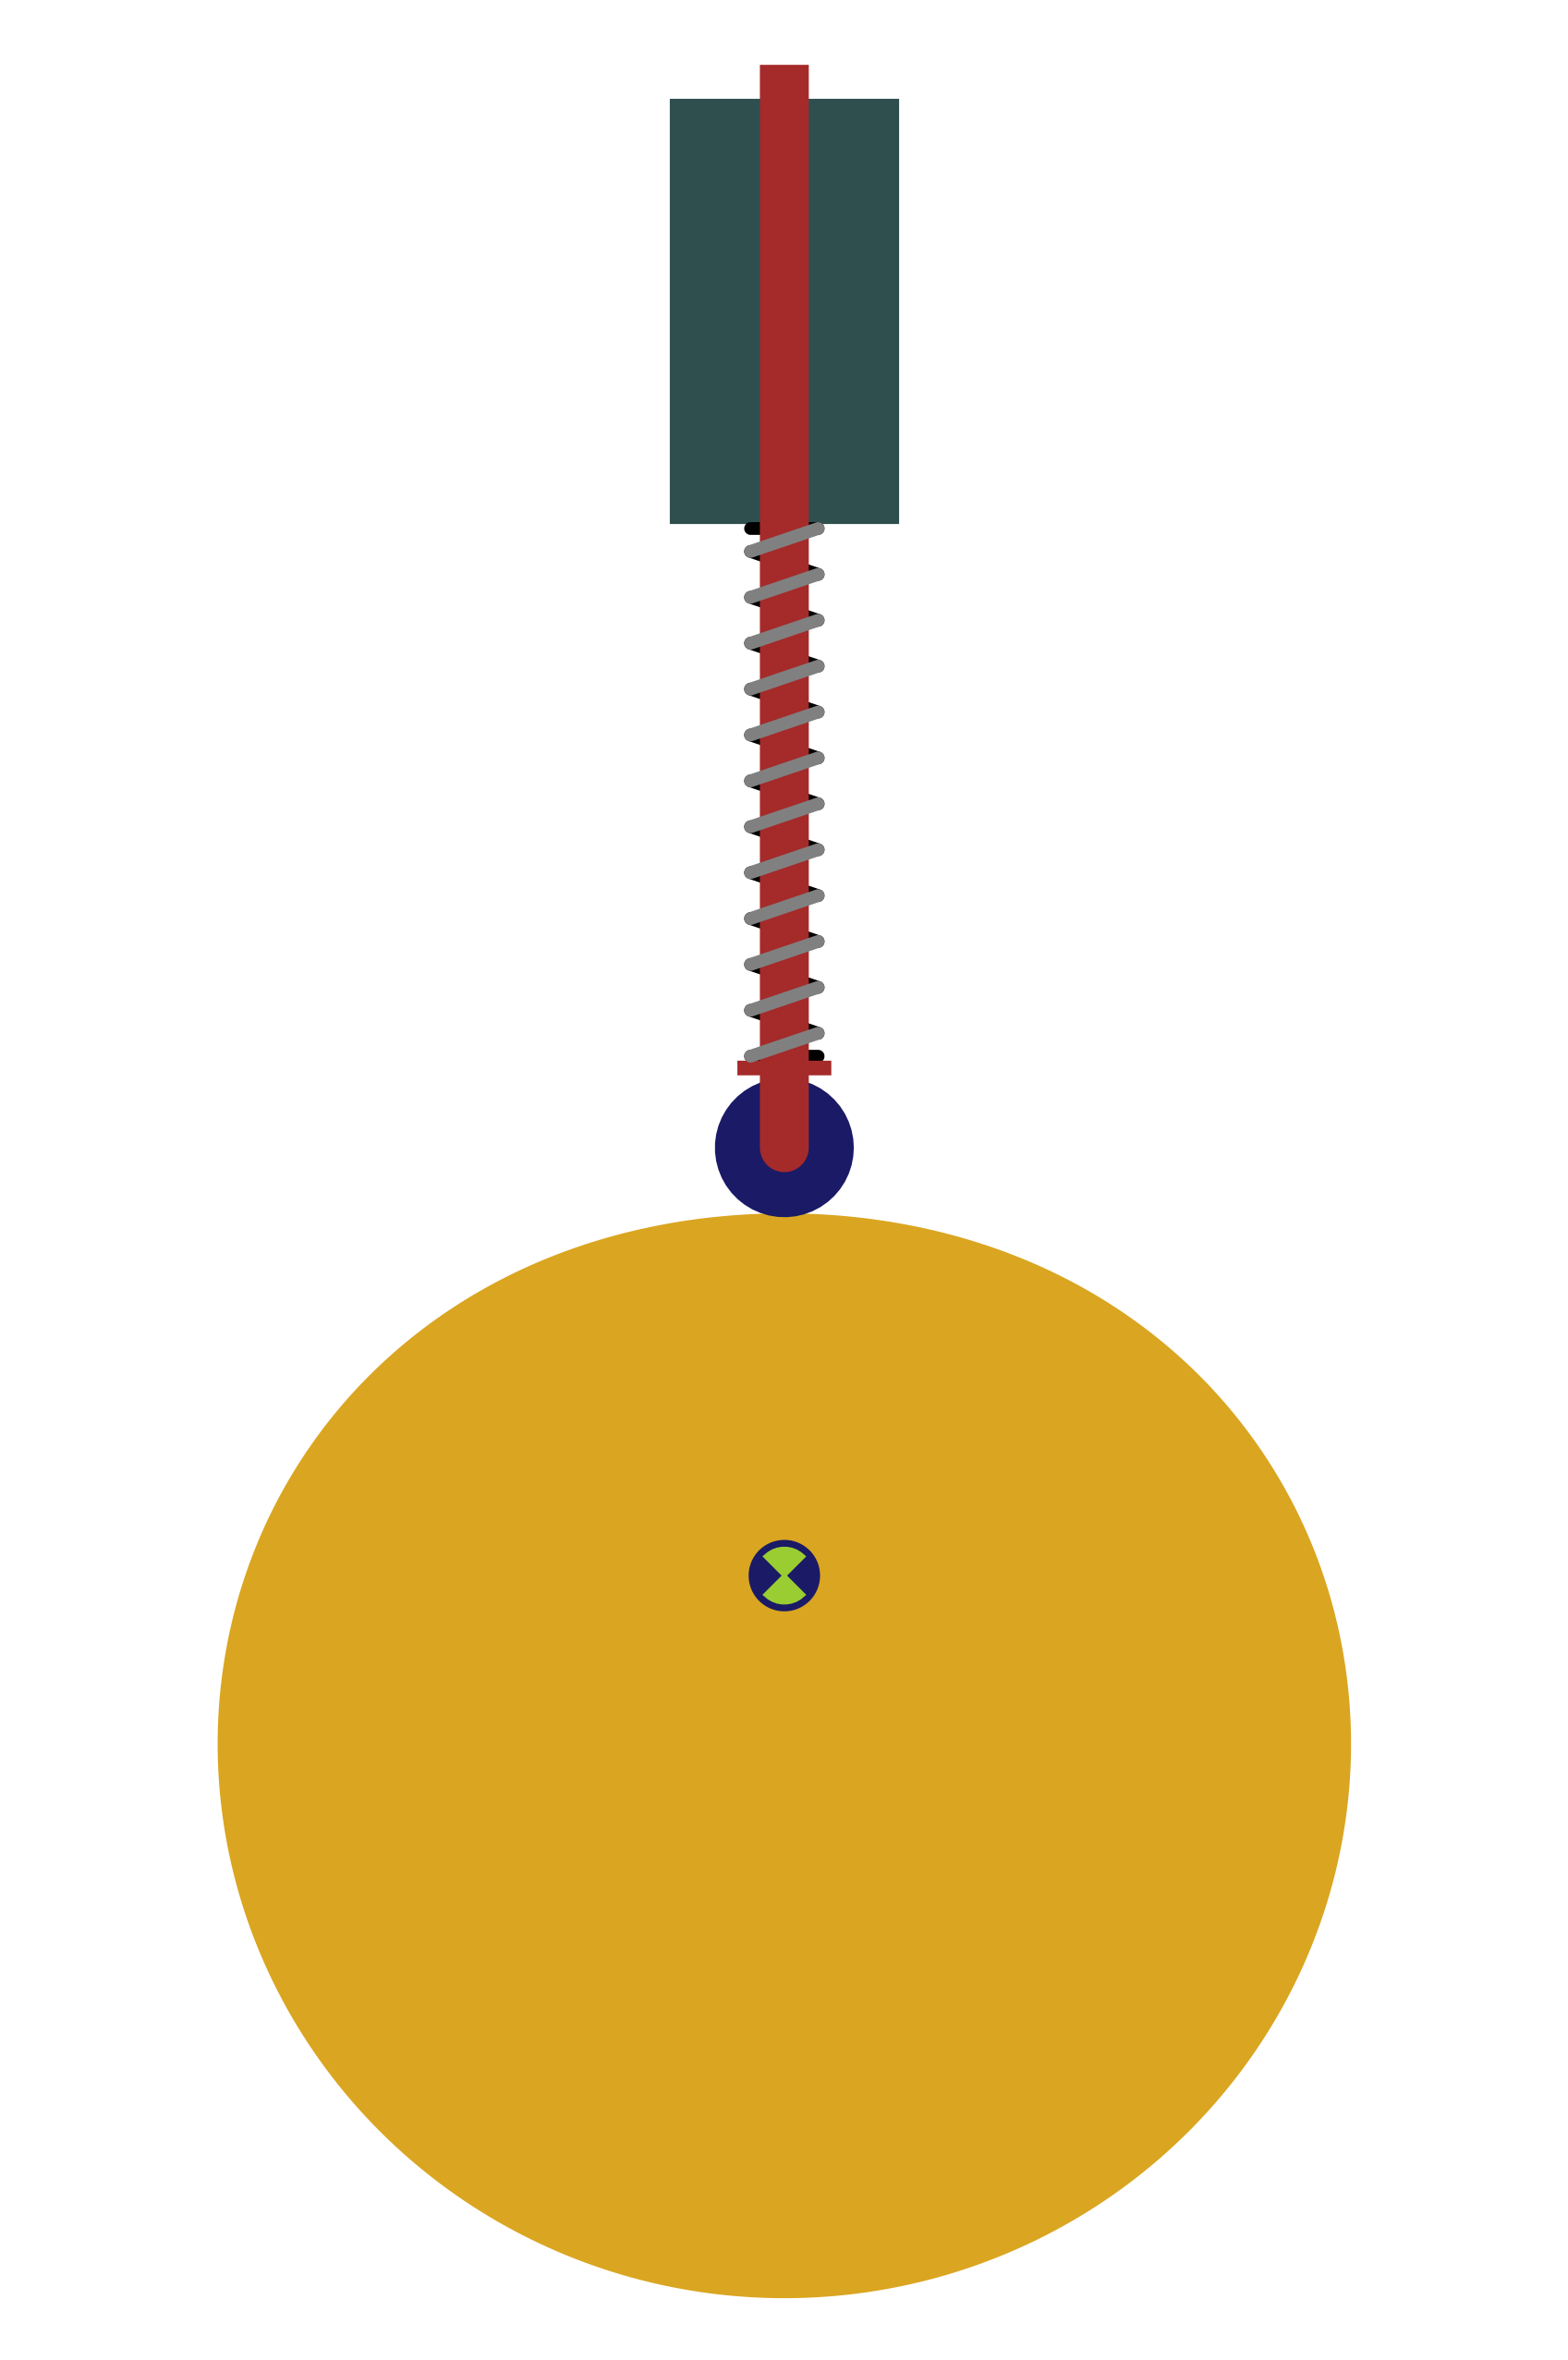

In [20]:
fig, ax=plt.subplots()
ax.set_axis_off()
init_func=Cam.initAnim(ax),
dpi=100
width = 1920/dpi
hight = 1080/dpi
fig.set_size_inches(width,hight)

anim3 = FuncAnimation(fig,  Cam, frames=np.arange(1000),
                    interval=100, blit=False)
plt.show()

## Saving the cam animation to a file

In [22]:
writer = animation.writers['ffmpeg'](fps=30)
anim3.save('Cam01.mp4',writer=writer,dpi=dpi)

## Complete code

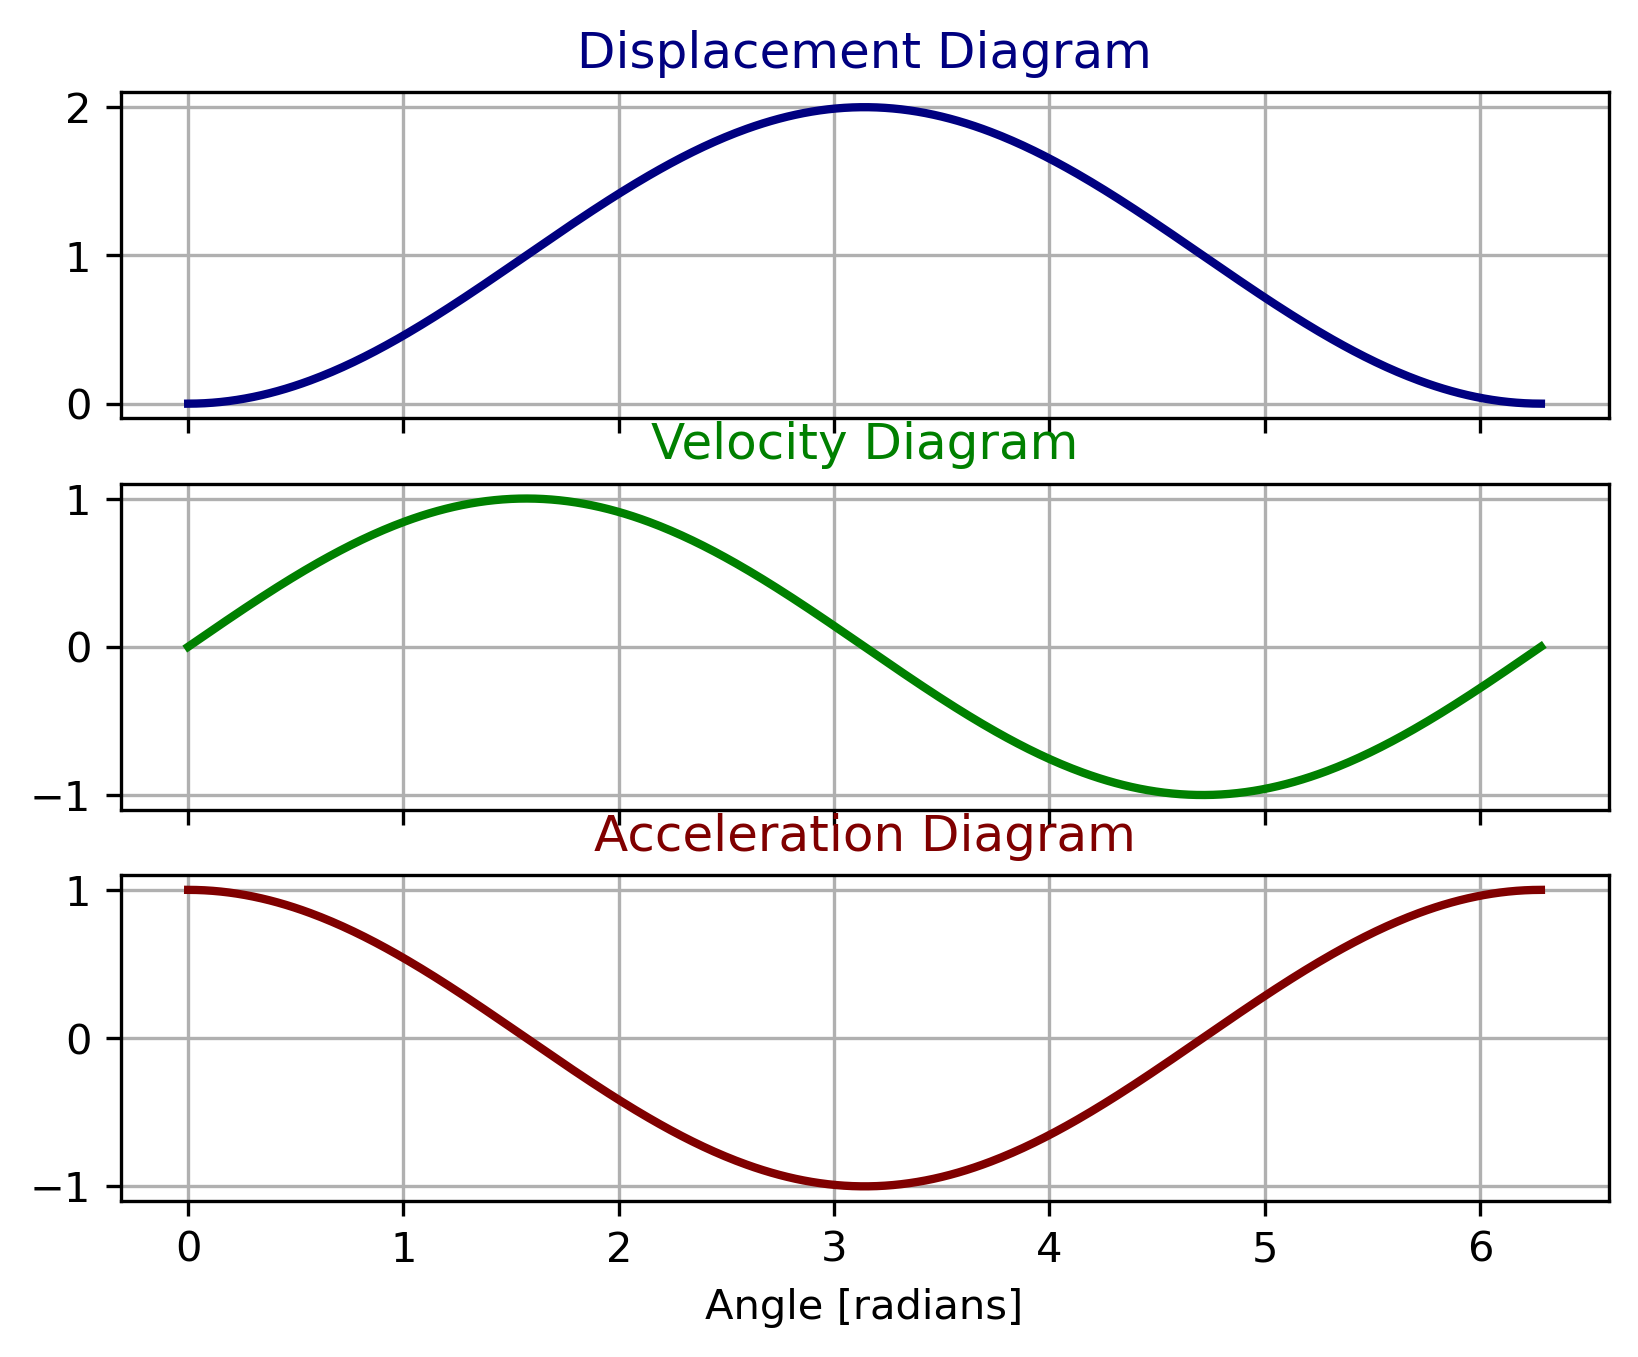

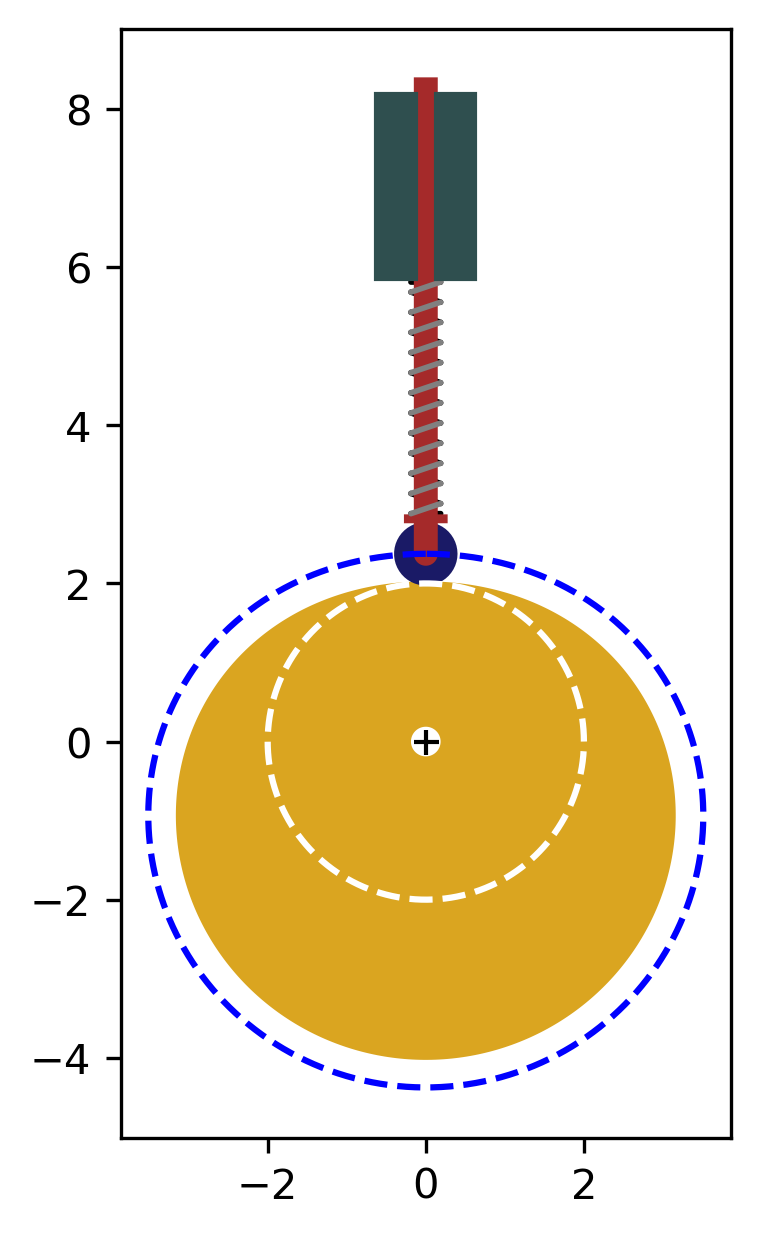

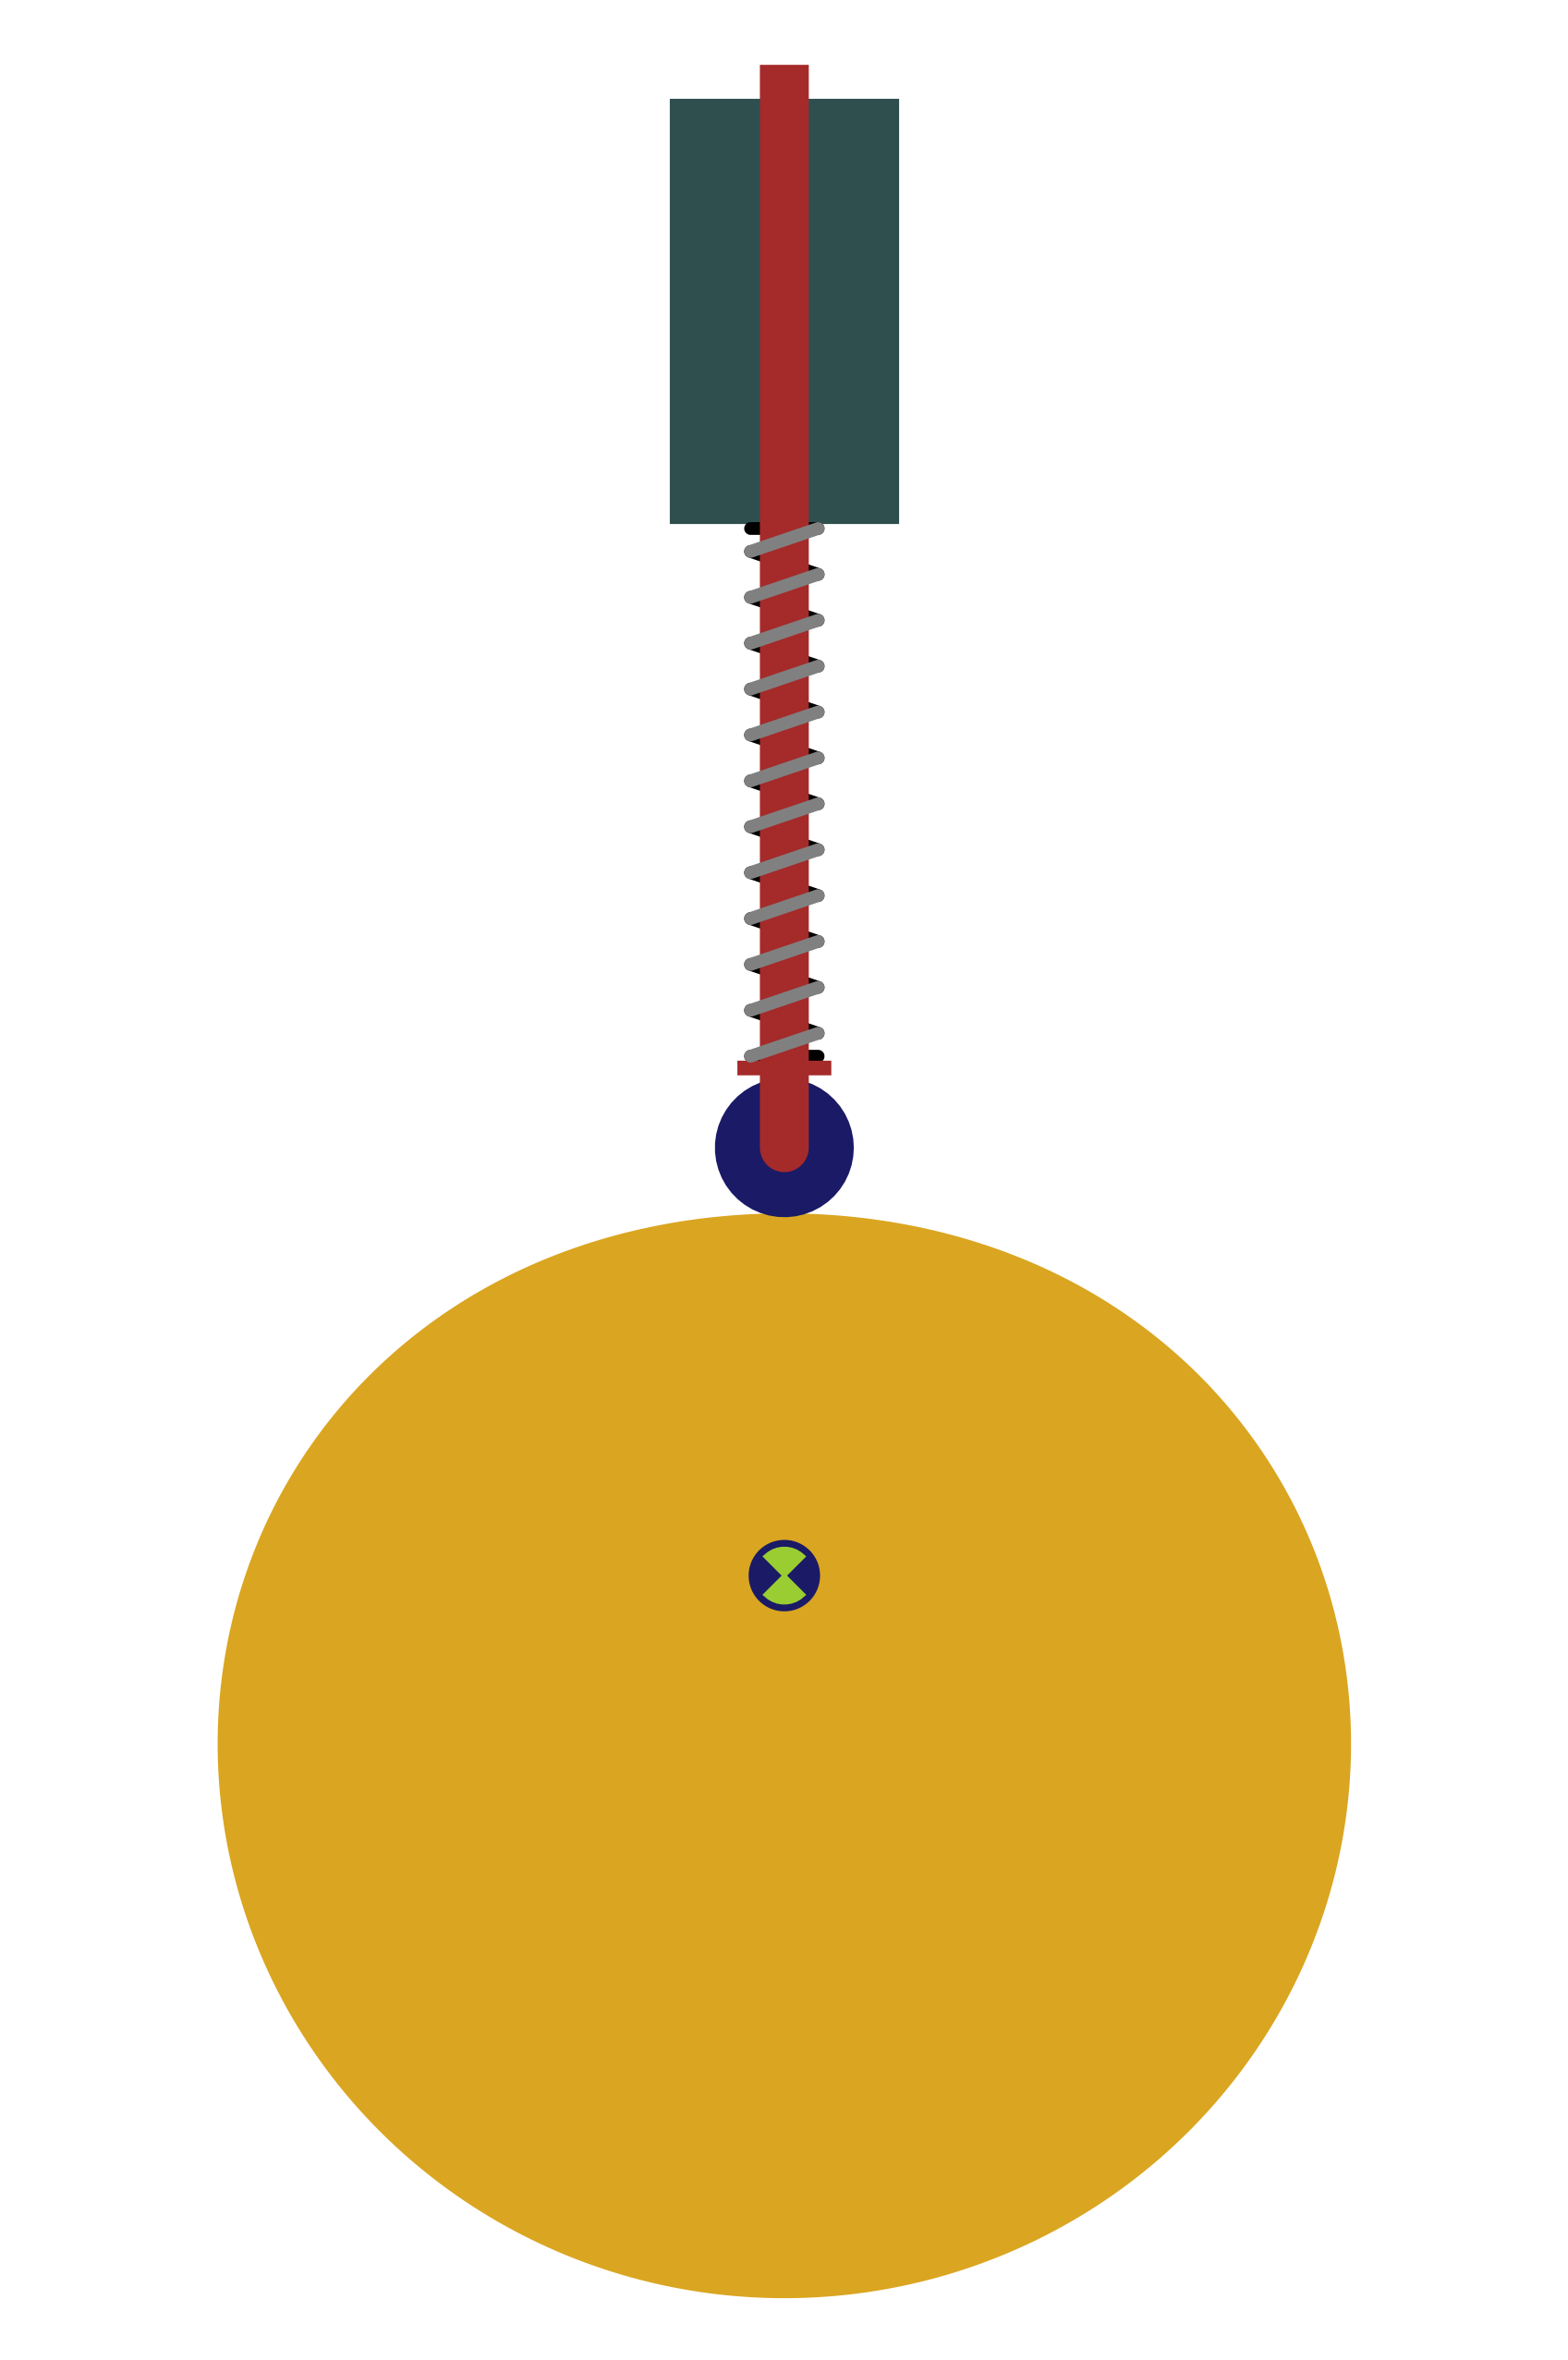

In [24]:
"""
The reciprocating radial roller follower of a plate
cam is to rise 2 in with simple harmonic motion
in 180◦ of cam rotation and return with simple
harmonic motion in the remaining 180◦. If the roller
radius is 0.375 in and the prime-circle radius is 2 in,
construct the displacement diagram, the pitch curve,
and the cam profile for clockwise cam rotation.
"""
#%% Libraries
from DiskCamMechanismLibrary import PDCamRollerFollower
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# %% Simple Harmonic Motion
def SimpleHarmonicMotion(th,L):
    y = 0.5*L*(1-np.cos(th))
    yp = 0.5*L*np.sin(th)
    ypp = 0.5*L*np.cos(th)
    return y,yp,ypp
    
# %% problem data
L=2
Rprime=2 #prime radius circle
rd=0.375 #roller radius
Rdrill=3/16 # drill bit radius (cam center)
eccentricity = 0.0
FollowerAng = np.pi/2 # Angular position of the follower in radians
theta = np.linspace(0,1,500)*2*np.pi # angular sweep from zero to 2 pi radians
# calculate displacement, velocity, acceleration
y,yp,ypp = SimpleHarmonicMotion(theta,L) 

# Group data in dictionary, for other parameters consult the documentation of DiskCamMechanismLibrary
CamData={'theta':theta,
         'y':y,
         'yp':yp,
         'ypp':ypp,
         'Rbase':Rprime,
         'Rhole':Rdrill,
         'epsilon':eccentricity,
         'FollowerAng':FollowerAng,
         'Followerwidth': 4/16,
         'turn_direction':'clockwise',
         'Rroller':rd
        }

#%% Calculating the Cam Profile
Cam=PDCamRollerFollower(**CamData)

#%% Motion diagram
figMD=plt.figure()
Cam.PlotMotionDiagram(figMD)

#%% Plot the cam profile
figPCam=plt.figure()
Cam.PlotCamRollerFollower(figPCam)

#%% Cam animation
fig, ax=plt.subplots()
ax.set_axis_off()
init_func=Cam.initAnim(ax),
dpi=100
width = 1920/dpi
hight = 1080/dpi
fig.set_size_inches(width,hight)

anim3 = FuncAnimation(fig, Cam, frames=np.arange(1000),
                    interval=100, blit=False)
plt.show()

#%% Saving the cam animation to a file
writer = animation.writers['ffmpeg'](fps=30)
anim3.save('Cam01.mp4',writer=writer,dpi=dpi)